In [214]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [150]:
df = pd.read_csv(r"C:\Users\asus\Desktop\Arizona\ASU\Sem1\Project\archive\PS_20174392719_1491204439457_log.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [152]:
df.shape

(6362620, 11)

In [154]:
df2 =df.drop(['nameOrig', 'nameDest','isFlaggedFraud'],axis=1)
df2.head()


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [156]:
df2['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [158]:
dummies = pd.get_dummies(df2['type'],dtype =int).drop('CASH_IN',axis =1)
dummies

,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,1,0
1,0,0,1,0
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
6362615,1,0,0,0
6362616,0,0,0,1
6362617,1,0,0,0
6362618,0,0,0,1


In [160]:
df3 = pd.concat([df2,dummies], axis=1).drop(['type'],axis=1)
df3

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,1,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,1,0
2,1,181.00,181.00,0.00,0.00,0.00,1,0,0,0,1
3,1,181.00,181.00,0.00,21182.00,0.00,1,1,0,0,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,1,0,0,0
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,0,0,1
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,1,0,0,0
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,0,0,1


In [109]:
x_train,x_test, y_train, y_test =train_test_split(df3.drop(['isFraud'], axis=1),df3.isFraud,test_size = 0.2,random_state= False)

In [111]:
x_train.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_OUT,DEBIT,PAYMENT,TRANSFER
1657090,158,99986.73,7845.07,0.00,914025.09,1014011.83,1,0,0,0
3056545,234,62405.63,16603.00,0.00,466525.55,528931.18,1,0,0,0
224722,14,2291393.07,0.00,0.00,3729395.93,6020789.00,0,0,0,1
495935,20,14173.77,11447430.20,11461603.97,3047711.43,3033537.66,0,0,0,0
4412383,322,301264.36,0.00,0.00,806211.40,1107475.76,1,0,0,0


In [113]:
model = LogisticRegression()
model.fit(x_train,y_train)

C:\Users\asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [115]:
model.score(x_test,y_test)

0.9984888300731459

In [117]:
predict = model.predict(x_test)

In [119]:
cm = confusion_matrix(y_test,predict)

Text(50.722222222222214, 0.5, 'Actual')

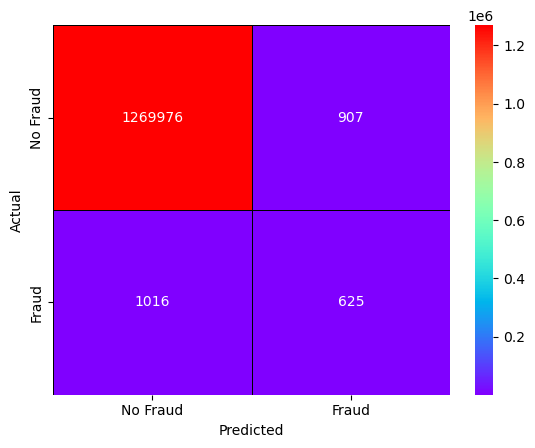

In [121]:
sns.heatmap(cm,cmap= 'rainbow', annot= True,fmt= 'd', linecolor = 'Black', linewidths= 0.5)
plt.xticks(np.arange(2)+.5,['No Fraud', 'Fraud'])
plt.yticks(np.arange(2)+.5,['No Fraud', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [162]:
df2.pivot_table(values= 'amount', index='type', columns= 'isFraud', aggfunc= 'count')

isFraud,0,1
type,,
CASH_IN,1399284.0,NaN
CASH_OUT,2233384.0,4116.0
DEBIT,41432.0,NaN
PAYMENT,2151495.0,NaN
TRANSFER,528812.0,4097.0


In [164]:
dffilter = df2[df2.type.isin(['CASH_OUT', 'TRANSFER'])]
dffilter.pivot_table(values= 'amount',index= 'type', columns='isFraud', aggfunc='count')

isFraud,0,1
type,,
CASH_OUT,2233384,4116
TRANSFER,528812,4097


In [166]:
encoder = LabelEncoder()

In [168]:
dffilter['typeEncode']= encoder.fit_transform(dffilter['type'])
dffilter.pivot_table(values= 'amount',index= 'typeEncode', columns='isFraud', aggfunc='count')

C:\Users\asus\AppData\Local\Temp\ipykernel_28656\2272830057.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffilter['typeEncode']= encoder.fit_transform(dffilter['type'])


isFraud,0,1
typeEncode,,
0,2233384,4116
1,528812,4097


In [170]:
dffilter1 =dffilter.drop(['step','type'],axis=1)

In [172]:
dffilter1.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,typeEncode
2,181.00,181.0,0.0,0.0,0.00,1,1
3,181.00,181.0,0.0,21182.0,0.00,1,0
15,229133.94,15325.0,0.0,5083.0,51513.44,0,0
19,215310.30,705.0,0.0,22425.0,0.00,0,1
24,311685.89,10835.0,0.0,6267.0,2719172.89,0,1


In [178]:
X_train,X_test, y_train, y_test =train_test_split(dffilter1.drop(['isFraud'], axis=1), dffilter1.isFraud,test_size= 0.2,random_state= False)

In [180]:
LogModel = LogisticRegression()

In [184]:
LogModel.fit(X_train,y_train)

LogisticRegression()

In [223]:
predict= LogModel.predict(X_test)

In [225]:
LogModel.score(X_test,y_test)

0.9982746236116676

Text(50.722222222222214, 0.5, 'Actual')

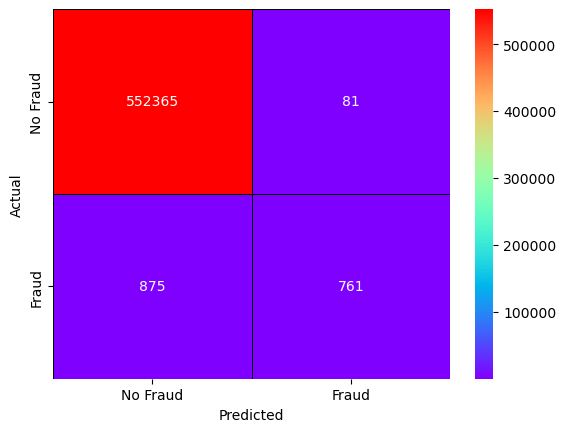

In [227]:
cm1 = confusion_matrix(y_test,predict)
sns.heatmap(cm1,cmap= 'rainbow', annot= True,fmt= 'd', linecolor = 'Black', linewidths= 0.5)
plt.xticks(np.arange(2)+.5,['No Fraud', 'Fraud'])
plt.yticks(np.arange(2)+.5,['No Fraud', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [229]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552446
           1       0.90      0.47      0.61      1636

    accuracy                           1.00    554082
   macro avg       0.95      0.73      0.81    554082
weighted avg       1.00      1.00      1.00    554082



In [230]:
DesicionModel = DecisionTreeClassifier()

In [233]:
DesicionModel.fit(X_train,y_train)

DecisionTreeClassifier()

In [234]:
predict2 =DesicionModel.predict(X_test)

Text(50.722222222222214, 0.5, 'Actual')

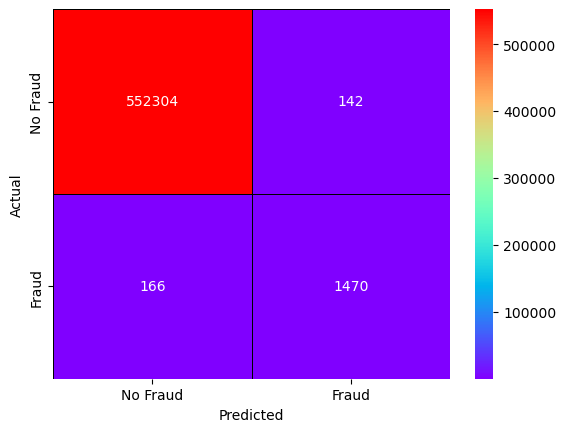

In [237]:
cm1 = confusion_matrix(y_test,predict2)
sns.heatmap(cm1,cmap= 'rainbow', annot= True,fmt= 'd', linecolor = 'Black', linewidths= 0.5)
plt.xticks(np.arange(2)+.5,['No Fraud', 'Fraud'])
plt.yticks(np.arange(2)+.5,['No Fraud', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [239]:
print(classification_report(y_test,predict2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552446
           1       0.91      0.90      0.91      1636

    accuracy                           1.00    554082
   macro avg       0.96      0.95      0.95    554082
weighted avg       1.00      1.00      1.00    554082

